In [1]:
import pandas as pd


In [5]:
# base_data_path = '../data/'

# 'Data/ec_data/2024_TAPS_Veris_raw_spatial_data.xlsx'
# plot this spacial data

In [7]:
import xml.etree.ElementTree as ET


In [8]:
xml_file_path = '../Data/plot_boundaries/Map with all plots/2024_Colby_TAPS_Harvest_Area.shp.xml'
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Function to print the metadata in a readable format
def print_metadata(element, level=0):
    indent = "  " * level
    if element.text and element.text.strip():
        print(f"{indent}{element.tag}: {element.text.strip()}")
    else:
        print(f"{indent}{element.tag}")
    
    # Iterate through child elements recursively
    for child in element:
        print_metadata(child, level + 1)


In [9]:

# Print metadata from root element
print("Exploring XML Metadata:\n")
print_metadata(root)

Exploring XML Metadata:

metadata
  Esri
    CreaDate: 20240112
    CreaTime: 13380400
    ArcGISFormat: 1.0
    SyncOnce: FALSE
    DataProperties
      itemProps
        itemName: 2024_Colby_TAPS_Harvest_Area
        imsContentType: 002
        itemSize: 0.000
        itemLocation
          linkage: file://\\DARAN\C$\Users\daran\Dropbox\RIT-Files\Projects\Research_Projects\Colby_TAPS\2024\Management\Layout\2024_Colby_TAPS_Harvest_Area.shp
          protocol: Local Area Network
      coordRef
        type: Geographic
        geogcsn: GCS_WGS_1984
        csUnits: Angular Unit: Degree (0.017453)
        peXml: <GeographicCoordinateSystem xsi:type='typens:GeographicCoordinateSystem' xmlns:xsi='http://www.w3.org/2001/XMLSchema-instance' xmlns:xs='http://www.w3.org/2001/XMLSchema' xmlns:typens='http://www.esri.com/schemas/ArcGIS/3.1.0'><WKT>GEOGCS[&quot;GCS_WGS_1984&quot;,DATUM[&quot;D_WGS_1984&quot;,SPHEROID[&quot;WGS_1984&quot;,6378137.0,298.257223563]],PRIMEM[&quot;Greenwich&quot;,0.0]

# Expore Shape file 

In [64]:
import os 

import geopandas as gpd


In [65]:

shape_file_folder  = "../Data/plot_boundaries/Map with all plots/"
shape_file_name = '2024_Colby_TAPS_Harvest_Area.shp'
shp_path = os.path.join(shape_file_folder, shape_file_name)

df = gpd.read_file(shp_path)

In [82]:
print(df.head())

     Name  Block_ID  TRT_ID  Plot_ID  \
0  Span D         1      15     2502   
1  Span A         4      27      204   
2  Span A         4      30      206   
3  Span A         4       2      205   
4  Span A         2      14      203   

                                            geometry  
0  POLYGON ((-101.06572 39.387, -101.06572 39.386...  
1  POLYGON ((-101.06495 39.38511, -101.06495 39.3...  
2  POLYGON ((-101.06417 39.38511, -101.06417 39.3...  
3  POLYGON ((-101.06456 39.38511, -101.06456 39.3...  
4  POLYGON ((-101.06534 39.38512, -101.06534 39.3...  


In [67]:
len(set(df['Plot_ID'])), len(set(df['TRT_ID']))

(138, 35)

In [68]:
set(df['TRT_ID'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35}

In [76]:
for v in (df['geometry'][0].exterior.coords.xy):
    print(v)

array('d', [-101.06571698339155, -101.06571751108737, -101.06578489737637, -101.0658627293808, -101.06592978027459, -101.06592925284912, -101.06586214621205, -101.06578431420775, -101.06571698339155])
array('d', [39.38700480845006, 39.38692244767901, 39.38692283761492, 39.38692328799601, 39.38692367599123, 39.387006036750165, 39.38700564843663, 39.387005198060706, 39.38700480845006])


In [55]:

print(df.head(2))

     Name  Block_ID  TRT_ID  Plot_ID  \
0  Span D         1      15     2502   
1  Span A         4      27      204   

                                            geometry  
0  POLYGON ((-101.06572 39.387, -101.06572 39.386...  
1  POLYGON ((-101.06495 39.38511, -101.06495 39.3...  


In [77]:
import shapefile as shp  # pyshp


In [80]:
sf = shp.Reader(shp_path)
polygons = []
for shape in sf.shapes():
    polygon = shape.points
    polygons.append(polygon)


TypeError: 'Reader' object is not subscriptable

In [81]:
for i, polygon in enumerate(polygons):
    print(polygon)

[(-101.06571698339155, 39.38700480845006), (-101.06571751108737, 39.38692244767901), (-101.06578489737637, 39.38692283761492), (-101.0658627293808, 39.38692328799601), (-101.06592978027459, 39.38692367599123), (-101.06592925284912, 39.387006036750165), (-101.06586214621205, 39.38700564843663), (-101.06578431420775, 39.387005198060706), (-101.06571698339155, 39.38700480845006)]
[(-101.06495076845482, 39.38511398077071), (-101.06495129701523, 39.385031617855304), (-101.06501851374037, 39.38503200916415), (-101.06509634274306, 39.38503245953632), (-101.06516356002379, 39.385032845389105), (-101.0651630317293, 39.385115209079004), (-101.06509583284037, 39.38511482021761), (-101.0650180028477, 39.385114369837254), (-101.06495076845482, 39.38511398077071)]
[(-101.06417246856563, 39.38510947696699), (-101.06417299801456, 39.38502711396842), (-101.06424021373414, 39.385027505384755), (-101.06431804373187, 39.38502795576261), (-101.0643852610221, 39.38502834167741), (-101.06438473184033, 39.385

In [57]:
pth = '/Users/sidharthrai/Documents/hackathone_2024/Data/ec_data/2024_TAPS_Veris_raw_spatial_data.xlsx'
df_1 = pd.read_excel(pth)

In [59]:
print(df_1.head())

         Long        Lat     Red      IR  Altitude  Speed    Temp  Depth  \
0 -101.064163  39.387197  230.21  422.88     967.8   2.93  127.14   2.74   
1 -101.064163  39.387187  229.33  418.54     967.9   3.03  127.12   2.76   
2 -101.064162  39.387173  228.17  412.91     968.0   3.19  127.15   2.77   
3 -101.064162  39.387160  227.15  408.44     968.1   3.35  127.26   2.77   
4 -101.064163  39.387147  226.43  405.77     968.1   3.51  127.48   2.76   

   EC SH  EC DP  EC Ratio   Slope   Curve  
0  44.65  43.73      0.98  0.6943 -0.0008  
1  45.22  44.39      0.98  0.6889 -0.0021  
2  46.25  45.44      0.98  0.6801 -0.0041  
3  47.37  46.50      0.98  0.6693 -0.0067  
4  48.33  47.33      0.98  0.6561 -0.0099  


In [60]:
len(set(df_1['Long']))

3593

In [61]:
len(df_1['Long'])

12598

898.25

# Ec from mahek

In [5]:

import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.interpolate import griddata
from rasterio.transform import from_origin

#Reading the EC data
ec_data = pd.read_excel("../Data/ec_data/2024_TAPS_Veris_raw_spatial_data.xlsx")
 
# generating a geodatabase from excel data
geometry = [Point(xy) for xy in zip(ec_data['Long'], ec_data['Lat'])]

# Create a GeoDataFrame
ec_vector_data = gpd.GeoDataFrame(ec_data, geometry=geometry)
ec_vector_data.set_crs("EPSG:4326", inplace=True) 
ec_vector_data.to_file('EC_vector_file.geojson', driver="GeoJSON")

#Interpolating the data
points = np.array(list(zip(ec_vector_data.geometry.x, ec_vector_data.geometry.y)))
ec_shallow = ec_vector_data['EC SH'].values
ec_deep = ec_vector_data['EC DP'].values

#Define grid parameters
x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()
grid_x, grid_y = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

#Interpolate data to the grid
grid_z_shallow = griddata(points, ec_shallow, (grid_x, grid_y), method='cubic') #cubic interpolation
grid_z_deep = griddata(points, ec_deep, (grid_x, grid_y), method='cubic') #cubic interpolation


#writing the raster file for EC shallow and deep
with rasterio.open('Interpolated_raster_EC_shallow.tif', 'w', driver= 'GTiff', 
                   height= 200, width= 200,
                   count= 1, crs = "EPSG:4326", dtype= grid_z_shallow.dtype,
                   transform = from_origin(x_min, y_max, (x_max - x_min) /100 , (y_max - y_min) /100)) as dst:
    dst.write(grid_z_shallow,1)

ec_raster_shallow = xr.open_dataarray("interpolated_raster_EC_shallow.tif",engine="scipy") 


#Plotting the EC shallow data   
plt.figure(figsize=(8,6))
ec_raster_shallow.plot(cmap='inferno_r', vmax=60, vmin=0)
plt.title('EC Shallow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
    


TypeError: Error: /Users/sidharthrai/Documents/hackathone_2024/sidharth_rai/interpolated_raster_EC_shallow.tif is not a valid NetCDF 3 file
            If this is a NetCDF4 file, you may need to install the
            netcdf4 library, e.g.,

            $ pip install netcdf4
            

In [ ]:
with rasterio.open('Interpolated_raster_EC_deep.tif', 'w', driver= 'GTiff', 
                   height= grid_z_deep.shape[0], width= grid_z_deep.shape[1],
                   count= 1, crs = "EPSG:4326", dtype= grid_z_deep.dtype,
                   transform = from_origin(x_min, y_max, (x_max - x_min) /100 , (y_max - y_min) /100)) as dst:
    dst.write(grid_z_deep,1)

ec_raster_deep = xr.open_dataarray("interpolated_raster_EC_deep.tif") 

 #Plotting the EC deep data     
plt.figure(figsize=(8,6))
ec_raster_deep.plot(cmap='inferno_r', vmax=60, vmin=0)
plt.title('EC Deep')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:

#Clipping the EC values by plt boundary
plot_boundary = gpd.read_file("../Data/plot_boundaries/Map with all plots/2024_Colby_TAPS_Harvest_Area.shx")


#Define function for cliping raster file to tuttle creek
clip_fn = lambda polygon, R: R.rio.clip( [polygon.geometry], 
                                        crs = R.rio.crs,
                                        all_touched = True)


#Clip the EC values to plot boundary
plot_boundary['EC_shallow'] = plot_boundary.apply(lambda row: clip_fn(row,ec_raster_shallow), axis =1)
plot_boundary.head(3)

plot_boundary['EC_deep'] = plot_boundary.apply(lambda row: clip_fn(row,ec_raster_deep), axis =1)
plot_boundary.head(3)


                                
#Plotting the EC values 
fig,ax = plt.subplots(figsize = (10,8))
plot_boundary.loc[ [0], 'geometry'].boundary.plot(ax=ax, edgecolor = 'k', linewidth=8)
plot_boundary.loc[0, 'EC_shallow'].plot(ax=ax, cmap='inferno_r')
ax.set_title('EC Shallow')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude') 
plt.show()


In [ ]:

fig,ax = plt.subplots(figsize = (10,8))
plot_boundary.loc[ [0], 'geometry'].boundary.plot(ax=ax, edgecolor = 'k', linewidth=8)
plot_boundary.loc[0, 'EC_deep'].plot(ax=ax, cmap='inferno_r')
ax.set_title('EC Deep')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


## crop_water_demand

In [5]:
import pandas as pd
arable_data = pd.read_excel("../Data/sensor_data/24 KSU TAPS Arable.xlsx", sheet_name=None, skiprows=2)

arable_data.keys()

dict_keys(['Team #2 Data', 'Team #4 Data', 'Team #5 Data', 'Team #13 Data', 'Team #15 Data', 'Team #16 Data', 'Team #18 Data', 'Team #21 Data', 'Team #22 Data', 'Team #26 Data', 'Team #27 Data', 'Team #28 Data'])

In [8]:
arable_df = arable_data["Team #2 Data"]

In [11]:
arable_data

{'Team #2 Data':      Timestamp  Chlorophyll Index  Arable Field Evapotranspiration (mm)  \
 0   2024-06-04               0.45                                  0.15   
 1   2024-06-05               0.44                                  0.25   
 2   2024-06-06               0.44                                  0.24   
 3   2024-06-07               0.48                                  0.23   
 4   2024-06-08               0.50                                  0.20   
 ..         ...                ...                                   ...   
 101 2024-09-13               3.05                                  0.19   
 102 2024-09-14               2.78                                  0.15   
 103 2024-09-15               2.80                                  0.19   
 104 2024-09-16               2.63                                  0.17   
 105 2024-09-17                NaN                                  0.02   
 
      Arable Canopy Evapotranspiration (mm)  Growing Degree Days  \
 0

In [12]:
arable_df

,Timestamp,Chlorophyll Index,Arable Field Evapotranspiration (mm),Arable Canopy Evapotranspiration (mm),Growing Degree Days,Accumulated Growing Degree Days,NDVI,Minimum Relative Humidity,Relative Humidity at Max Temp,Relative Humidity at Min Temp,...,Crop Coefficient,Leaf Wetness (Hours),Dew Temp,Crop Water Demand (mm/day),Sun Duration,Wind Direction,Wind Speed,Wind Direction Degrees,Max Wind Speed,Min Wind Speed
0,2024-06-04,0.45,0.15,0.00,21,419,0.10,35,37,81,...,0.00,0,55,0.0,6.8,SE,3,141,5,0
1,2024-06-05,0.44,0.25,0.00,19,437,0.10,21,22,94,...,0.00,5,53,0.0,12.6,SSW,2,201,4,0
2,2024-06-06,0.44,0.24,0.00,21,458,0.10,28,29,74,...,0.00,0,49,0.0,12.6,E,2,87,4,0
3,2024-06-07,0.48,0.23,0.00,23,481,0.12,28,28,74,...,0.00,2,60,0.0,9.6,S,3,170,5,0
4,2024-06-08,0.50,0.20,0.00,21,502,0.12,48,48,89,...,0.01,9,61,0.0,10.4,ESE,4,122,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2024-09-13,3.05,0.19,0.16,24,2659,0.71,31,32,75,...,0.86,0,56,0.0,10.1,SE,4,143,6,2
102,2024-09-14,2.78,0.15,0.13,22,2681,0.67,39,39,74,...,0.80,0,58,0.0,9.6,ESE,3,110,5,2
103,2024-09-15,2.80,0.19,0.15,24,2705,0.68,23,26,87,...,0.81,0,58,0.0,9.7,SE,4,145,6,2
104,2024-09-16,2.63,0.17,0.14,25,2729,0.65,21,21,91,...,0.78,1,59,0.0,8.8,SSE,4,153,5,2


In [ ]:
import pandas as pd

# Load the Excel data into a dictionary with sheet names as keys
arable_data = pd.read_excel("../Data/sensor_data/24 KSU TAPS Arable.xlsx", sheet_name=None, skiprows=2)

for key, value in arable_data.items():
    arable_data


,Timestamp,Chlorophyll Index,Arable Field Evapotranspiration (mm),Arable Canopy Evapotranspiration (mm),Growing Degree Days,Accumulated Growing Degree Days,NDVI,Minimum Relative Humidity,Relative Humidity at Max Temp,Relative Humidity at Min Temp,...,Crop Coefficient,Leaf Wetness (Hours),Dew Temp,Crop Water Demand (mm/day),Sun Duration,Wind Direction,Wind Speed,Wind Direction Degrees,Max Wind Speed,Min Wind Speed
0,2024-06-04,0.45,0.15,0.00,21,419,0.10,35,37,81,...,0.00,0,55,0.0,6.8,SE,3,141,5,0
1,2024-06-05,0.44,0.25,0.00,19,437,0.10,21,22,94,...,0.00,5,53,0.0,12.6,SSW,2,201,4,0
2,2024-06-06,0.44,0.24,0.00,21,458,0.10,28,29,74,...,0.00,0,49,0.0,12.6,E,2,87,4,0
3,2024-06-07,0.48,0.23,0.00,23,481,0.12,28,28,74,...,0.00,2,60,0.0,9.6,S,3,170,5,0
4,2024-06-08,0.50,0.20,0.00,21,502,0.12,48,48,89,...,0.01,9,61,0.0,10.4,ESE,4,122,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2024-09-13,3.05,0.19,0.16,24,2659,0.71,31,32,75,...,0.86,0,56,0.0,10.1,SE,4,143,6,2
102,2024-09-14,2.78,0.15,0.13,22,2681,0.67,39,39,74,...,0.80,0,58,0.0,9.6,ESE,3,110,5,2
103,2024-09-15,2.80,0.19,0.15,24,2705,0.68,23,26,87,...,0.81,0,58,0.0,9.7,SE,4,145,6,2
104,2024-09-16,2.63,0.17,0.14,25,2729,0.65,21,21,91,...,0.78,1,59,0.0,8.8,SSE,4,153,5,2


In [21]:
#Loop through each DataFrame and add a trace for each
import plotly.graph_objects as go

fig = go.Figure()

for idx, key in enumerate(arable_data, start=2): 
    df = arable_data[key]
    fig.add_trace(go.Scatter(
        y=df["Arable Canopy Evapotranspiration (mm)"]+df["Arable Field Evapotranspiration (mm)"],
        x=df["Timestamp"],
        name=f'Team_{idx}'
    ))
    # Customize layout
fig.update_layout(width=1000, height=500,
        title={'text': 'Crop Water Demand Over Time', 'x': 0.5},
        xaxis_title='Time',
        yaxis_title='Crop Water Demand (mm)')

fig.show()


# clipping data by Mahek  

In [22]:

import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.interpolate import griddata
from rasterio.transform import from_origin

#Reading the EC data
ec_data = pd.read_excel("../Data/ec_data/2024_TAPS_Veris_raw_spatial_data.xlsx")
 
# generating a geodatabase from excel data
geometry = [Point(xy) for xy in zip(ec_data['Long'], ec_data['Lat'])]

# Create a GeoDataFrame
ec_vector_data = gpd.GeoDataFrame(ec_data, geometry=geometry)
ec_vector_data.set_crs("EPSG:4326", inplace=True) 
ec_vector_data.to_file('EC_vector_file.geojson', driver="GeoJSON")

#Interpolating the data
points = np.array(list(zip(ec_vector_data.geometry.x, ec_vector_data.geometry.y)))
ec_shallow = ec_vector_data['EC SH'].values
ec_deep = ec_vector_data['EC DP'].values

#Define grid parameters
x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()
grid_x, grid_y = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

#Interpolate data to the grid
grid_z_shallow = griddata(points, ec_shallow, (grid_x, grid_y), method='cubic') #cubic interpolation
grid_z_deep = griddata(points, ec_deep, (grid_x, grid_y), method='cubic') #cubic interpolation


#writing the raster file for EC shallow and deep
with rasterio.open('Interpolated_raster_EC_shallow.tif', 'w', driver= 'GTiff', 
                   height= 200, width= 200,
                   count= 1, crs = "EPSG:4326", dtype= grid_z_shallow.dtype,
                   transform = from_origin(x_min, y_max, (x_max - x_min) /100 , (y_max - y_min) /100)) as dst:
    dst.write(grid_z_shallow,1)

ec_raster_shallow = xr.open_dataarray("interpolated_raster_EC_shallow.tif") 



In [27]:
# this is for the whole field and we are not showing this

#Plotting the EC shallow data   
# plt.figure(figsize=(8,6))
# ec_raster_shallow.plot(cmap='inferno_r', vmax=60, vmin=0)
# plt.title('EC Shallow')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

# this needed 
with rasterio.open('Interpolated_raster_EC_deep.tif', 'w', driver= 'GTiff', 
                   height= grid_z_deep.shape[0], width= grid_z_deep.shape[1],
                   count= 1, crs = "EPSG:4326", dtype= grid_z_deep.dtype,
                   transform = from_origin(x_min, y_max, (x_max - x_min) /100 , (y_max - y_min) /100)) as dst:
    dst.write(grid_z_deep,1)

ec_raster_deep = xr.open_dataarray("interpolated_raster_EC_deep.tif") 



#Clipping the EC values by plt boundary
plot_boundary = gpd.read_file("../Data/plot_boundaries/Map with all plots/2024_Colby_TAPS_Harvest_Area.shx")
#Define function for cliping raster file to tuttle creek
clip_fn = lambda polygon, R: R.rio.clip( [polygon.geometry], 
                                        crs = R.rio.crs,
                                        all_touched = True)

plot_boundary['EC_shallow'] = plot_boundary.apply(lambda row: clip_fn(row,ec_raster_shallow), axis =1)

plot_boundary['EC_deep'] = plot_boundary.apply(lambda row: clip_fn(row,ec_raster_deep), axis =1)


In [29]:
plot_boundary.head()

,Name,Block_ID,TRT_ID,Plot_ID,geometry,EC_shallow,EC_deep
0,Span D,1,15,2502,"POLYGON ((-101.06572 39.387, -101.06572 39.386...",[[[<xarray.DataArray 'band_data' ()> Size: 8B\...,[[[<xarray.DataArray 'band_data' ()> Size: 8B\...
1,Span A,4,27,204,"POLYGON ((-101.06495 39.38511, -101.06495 39.3...",[[[<xarray.DataArray 'band_data' ()> Size: 8B\...,[[[<xarray.DataArray 'band_data' ()> Size: 8B\...
2,Span A,4,30,206,"POLYGON ((-101.06417 39.38511, -101.06417 39.3...",[[[<xarray.DataArray 'band_data' ()> Size: 8B\...,[[[<xarray.DataArray 'band_data' ()> Size: 8B\...
3,Span A,4,2,205,"POLYGON ((-101.06456 39.38511, -101.06456 39.3...",[[[<xarray.DataArray 'band_data' ()> Size: 8B\...,[[[<xarray.DataArray 'band_data' ()> Size: 8B\...
4,Span A,2,14,203,"POLYGON ((-101.06534 39.38512, -101.06534 39.3...",[[[<xarray.DataArray 'band_data' ()> Size: 8B\...,[[[<xarray.DataArray 'band_data' ()> Size: 8B\...


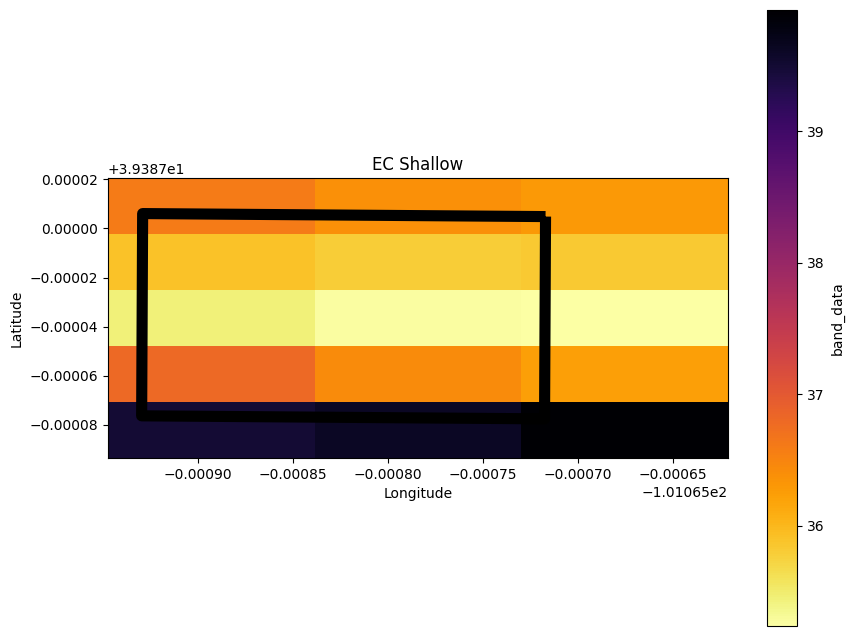

In [30]:
#Plotting the EC values 
fig,ax = plt.subplots(figsize = (10,8))
plot_boundary.loc[ [0], 'geometry'].boundary.plot(ax=ax, edgecolor = 'k', linewidth=8)
plot_boundary.loc[0, 'EC_shallow'].plot(ax=ax, cmap='inferno_r')
ax.set_title('EC Shallow')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude') 
plt.show()